# **Salifort Motors Employee Satisfaction Project**

**Google Advanced Data Analyst Certificate**

**Capstone Project**

## **Pace: Plan**

### 项目背景

Salifort Motors的人力资源部门希望采取一些举措来提高公司员工的满意度水平。他们收集了员工的数据，并提出了相关数据需求，需要数据部门根据对数据的理解提供基于建议，并构建一个模型，预测员工是否会离开公司。

HR部门希望通过这项工作，预测出可能会辞职的员工，并希望能够确定导致他们离开的因素，采取相关措施，提高员工满意度，降低流失率和招聘成本。

### 数据集

本次员工满意度项目数据集包含15,000行和10列，变量如下所示。

_**注意：** 本数据源来自[Kaggle](https://www.kaggle.com/datasets/mfaisalqureshi/hr-analytics-and-job-prediction?select=HR_comma_sep.csv)_。

变量 | 描述
-----|-----
satisfaction_level | 员工报告的工作满意度水平 [0–1]
last_evaluation | 员工最后一次绩效评估的得分 [0–1]
number_project | 员工参与的项目数量
average_monthly_hours | 员工每月平均工作小时数
time_spend_company | 员工在公司工作的时间（年）
Work_accident | 员工是否在工作期间发生事故
left | 员工是否离开了公司
promotion_last_5years | 员工在过去5年内是否晋升
Department | 员工所在的部门
salary | 员工的工资（美元）

💭
### 项目目标

- **目标**：利用数据分析来提供关于员工离职可能原因的见解，并构建一个预测模型，以便公司能够采取措施来改善员工满意度，减少员工离职率。
- **汇报对象**：Salifort Motors的人力资源部门负责人、公司高管
- **注意事项**：在分析员工离职可能原因时，需要确保遵循隐私保护的原则，进行信息脱敏。



### 项目规划
使用Decision Tree，Random Forest和XGBoost构建一个二元目标预测模型，预测员工是否流失，并列出可能影响员工流失率的重要因素。


**第一部分：** 探索性数据分析

分析数据集各变量对员工流失的影响，列出重点因素。

**第二部分：** 特征工程

进行特征选择、提取和转换，为建模准备数据。

**第三部分：** 建模

构建Decision Tree，Random Forest和XGBoost模型，进行模型评估，并择出最优模型。

**第四部分：** 结论建议

列出影响流失率重要特征，并提供下一步建议。

## Pace: Analyze
### 数据清洗
- 缺失值
- 重复项
- 异常值

In [1]:
# Import packages
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier, plot_importance

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

sns.set_theme(
    context='notebook',
    style='white'
)

In [2]:
# 导入数据集
df0 = pd.read_csv("HR_capstone_dataset.csv")
pd.set_option('display.max_columns', None)
df0.head(10)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
5,0.41,0.50,2,153,3,0,1,0,sales,low
6,0.10,0.77,6,247,4,0,1,0,sales,low
7,0.92,0.85,5,259,5,0,1,0,sales,low
8,0.89,1.00,5,224,5,0,1,0,sales,low
9,0.42,0.53,2,142,3,0,1,0,sales,low


In [3]:
# 查看数据基础信息
df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [4]:
# 查看各变量统计信息
df0.describe(include='all')

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999,14999
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10,3
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,sales,low
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4140,7316
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268,NaN,NaN
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281,NaN,NaN
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000,NaN,NaN
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000,NaN,NaN
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000,NaN,NaN
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000,NaN,NaN


标准化列名，使它们全部采用snake_case，纠正任何拼写错误的列名，并根据需要使列名更简洁。

In [5]:
# 标准化列名
df0.columns = [col.lower() for col in df0.columns]
df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


`average_montly_hours`拼写有误，需要进行更正。

In [6]:
df0.rename(columns={'average_montly_hours': 'average_monthly_hours'}, inplace=True)

#### 检查缺失值

In [7]:
# Check for missing values
df0.isna().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_monthly_hours    0
time_spend_company       0
work_accident            0
left                     0
promotion_last_5years    0
department               0
salary                   0
dtype: int64

#### 检查重复项

In [8]:
# Check for duplicates
df0.loc[df0.duplicated(keep=False)].sort_values(by=df0.columns.to_list())

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spend_company,work_accident,left,promotion_last_5years,department,salary
30,0.09,0.62,6,294,4,0,1,0,accounting,low
12030,0.09,0.62,6,294,4,0,1,0,accounting,low
14241,0.09,0.62,6,294,4,0,1,0,accounting,low
71,0.09,0.77,5,275,4,0,1,0,product_mng,medium
12071,0.09,0.77,5,275,4,0,1,0,product_mng,medium
...,...,...,...,...,...,...,...,...,...,...
13089,1.00,0.88,6,201,4,0,0,0,technical,low
11375,1.00,0.93,5,167,3,0,0,0,sales,medium
13586,1.00,0.93,5,167,3,0,0,0,sales,medium
10691,1.00,0.93,5,231,2,0,0,0,marketing,medium


In [9]:
# 检查重复数据
df0.duplicated().sum()

3008

In [10]:
# 删除重复行
df = df0.drop_duplicates()
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11991 entries, 0 to 11999
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     11991 non-null  float64
 1   last_evaluation        11991 non-null  float64
 2   number_project         11991 non-null  int64  
 3   average_monthly_hours  11991 non-null  int64  
 4   time_spend_company     11991 non-null  int64  
 5   work_accident          11991 non-null  int64  
 6   left                   11991 non-null  int64  
 7   promotion_last_5years  11991 non-null  int64  
 8   department             11991 non-null  object 
 9   salary                 11991 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.0+ MB


#### 异常值处理

某些类型的模型对异常值更为敏感。在构建模型的阶段，考虑根据你决定使用的模型类型是否删除异常值。

例如，线性回归等参数化模型对异常值较为敏感，而树模型如随机森林和XGBoost等非参数化模型对异常值相对不太敏感。

因此，在构建线性回归等参数化模型时，可能需要删除异常值，以确保模型的稳健性和准确性。而在构建非参数化模型时，可以考虑保留异常值，因为这些模型通常能够更好地处理异常值。

Text(0.5, 1.0, 'Distribution of Tenure')

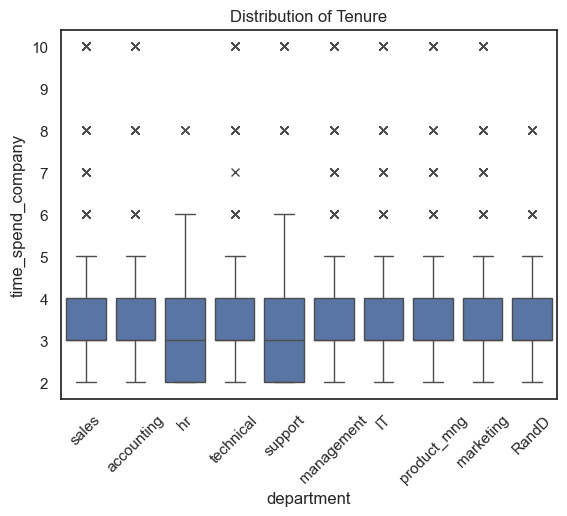

In [11]:
sns.boxplot(y=df['time_spend_company'], x=df['department'], flierprops={'marker': 'x'})
plt.xticks(rotation=45)
plt.title('Distribution of Tenure')


In [12]:
pct = np.quantile(df['time_spend_company'], [0.25, 0.75])
upper = pct[1] + 1.5 * (pct[1] - pct[0])
lower = pct[0] - 1.5 * (pct[1] - pct[0])

iqr_mask_tenure = (df['time_spend_company'] > upper) | (df['time_spend_company'] < lower)
iqr_mask_tenure.sum()

824

### EDA

#### 计算员工离职率

11991行有效数据中，员工离职率为16.6%

In [13]:
print(df['left'].value_counts())

df['left'].value_counts(normalize=True)

left
0    10000
1     1991
Name: count, dtype: int64


left
0    0.833959
1    0.166041
Name: proportion, dtype: float64

#### 变量可视化

##### Satisfaction level

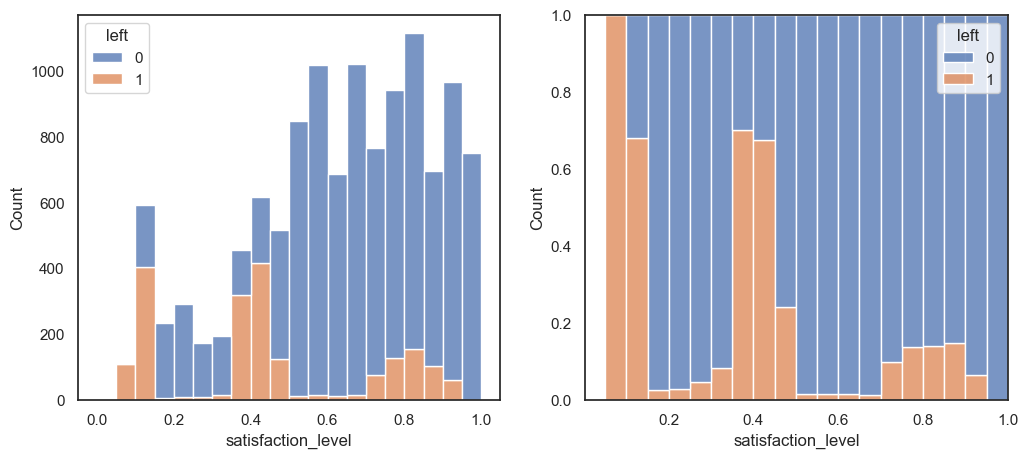

In [14]:
fig, ax = plt.subplots(1, 2, figsize=(12, 5))
sns.histplot(data=df, x='satisfaction_level', hue='left', multiple='stack', binwidth=0.05, binrange=[0, 1], ax=ax[0])
sns.histplot(data=df, x='satisfaction_level', hue='left', multiple='fill', binwidth=0.05, binrange=[0, 1], ax=ax[1])
plt.show()

In [15]:
df.satisfaction_level.describe()

count    11991.000000
mean         0.629658
std          0.241070
min          0.090000
25%          0.480000
50%          0.660000
75%          0.820000
max          1.000000
Name: satisfaction_level, dtype: float64

满意度水平呈现左偏分布，平均值为0.63，众数为0.66。约四分之一的员工满意度水平低于0.5，超过四分之一的员工满意度水平高于0.8。

##### Last Evaluation

C:\Users\Administrator\AppData\Local\Temp\ipykernel_11436\452331647.py:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=90)


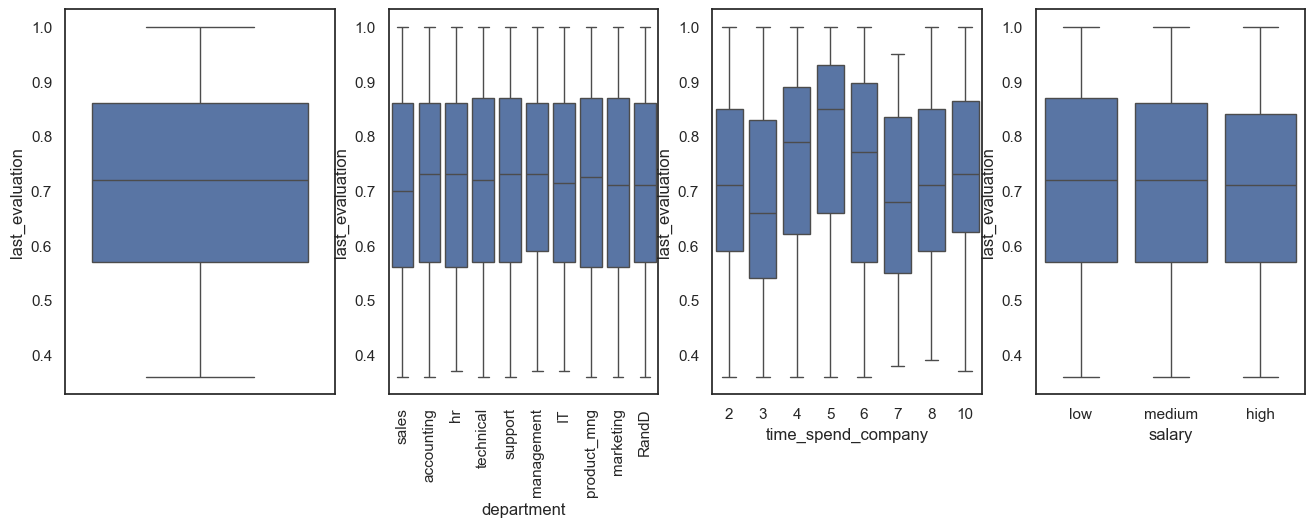

In [16]:
fig, ax = plt.subplots(1, 4, figsize=(16, 5))
sns.boxplot(data=df, y='last_evaluation', ax=ax[0])
sns.boxplot(data=df, y='last_evaluation', x='department', ax=ax[1])
ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=90)
sns.boxplot(data=df, y='last_evaluation', x='time_spend_company', ax=ax[2])
sns.boxplot(data=df, y='last_evaluation', x='salary', ax=ax[3])
plt.show()

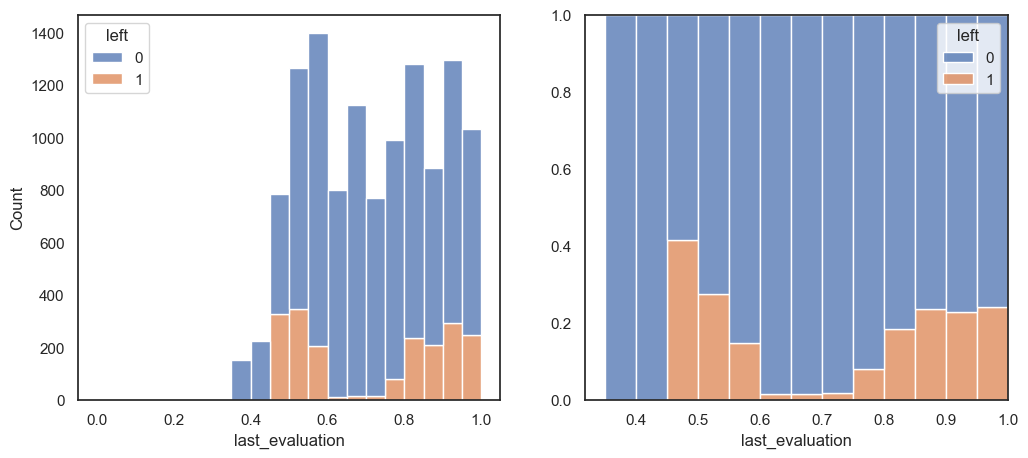

In [17]:
fig, ax = plt.subplots(1, 2, figsize=(12, 5))
sns.histplot(
    data=df,
    x='last_evaluation',
    hue='left',
    multiple='stack',
    binrange=[0, 1],
    binwidth=0.05,
    ax=ax[0]
)
sns.histplot(
    data=df,
    x='last_evaluation',
    hue='left',
    multiple='fill',
    binrange=[0, 1],
    binwidth=0.05,
    ax=ax[1]
)
ax[1].set_ylabel('')
plt.show()

In [18]:
df['last_evaluation'].describe()

count    11991.000000
mean         0.716683
std          0.168343
min          0.360000
25%          0.570000
50%          0.720000
75%          0.860000
max          1.000000
Name: last_evaluation, dtype: float64

员工最近一次绩效评估分数在各部门之间均匀分布，平均值约为0.72，接近一半的员工表现优于平均水平。

然而，超过四分之一的员工的评价分数低于0.6，这可能是他们离职的关键原因。

##### Number of projects assigned

C:\Users\Administrator\AppData\Local\Temp\ipykernel_11436\2888929936.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=45)


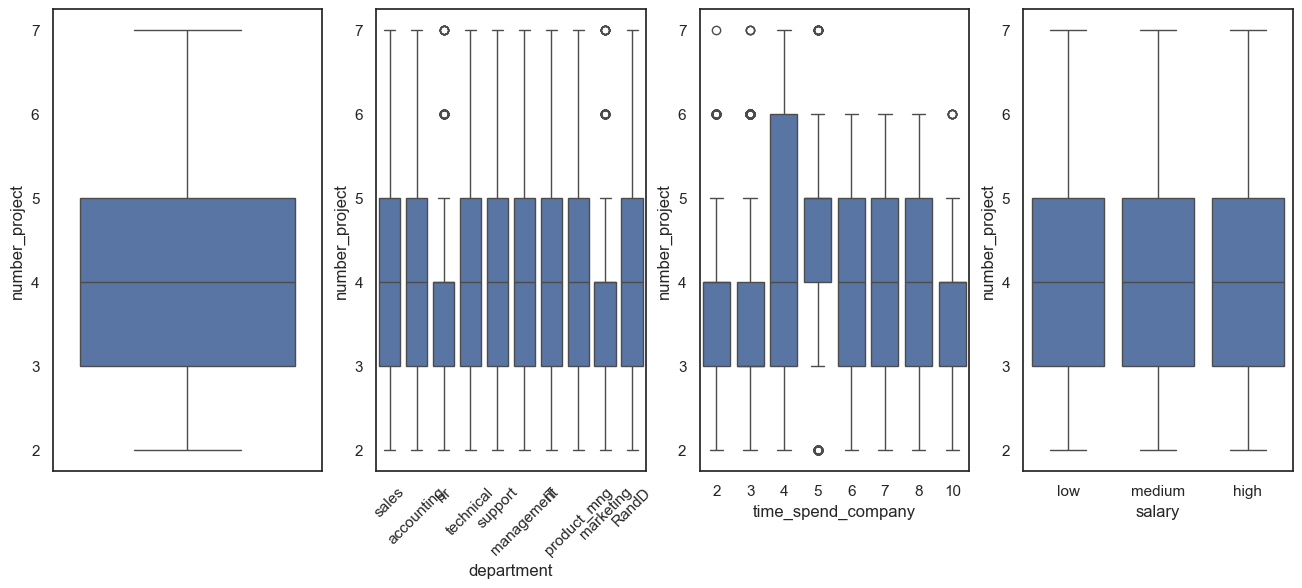

In [19]:
fig, ax = plt.subplots(1, 4, figsize=(16, 6))
sns.boxplot(data=df, y='number_project', ax=ax[0])
sns.boxplot(data=df, y='number_project', x='department', ax=ax[1])
sns.boxplot(data=df, y='number_project', x='time_spend_company', ax=ax[2])
sns.boxplot(data=df, y='number_project', x='salary', ax=ax[3])
ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=45)
plt.show()

In [20]:
df['number_project'].describe()

count    11991.000000
mean         3.802852
std          1.163238
min          2.000000
25%          3.000000
50%          4.000000
75%          5.000000
max          7.000000
Name: number_project, dtype: float64

In [21]:
df['number_project_per_year'] = df['number_project'] / df['time_spend_company']

C:\Users\Administrator\AppData\Local\Temp\ipykernel_11436\1737188325.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['number_project_per_year'] = df['number_project'] / df['time_spend_company']


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11991 entries, 0 to 11999
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   satisfaction_level       11991 non-null  float64
 1   last_evaluation          11991 non-null  float64
 2   number_project           11991 non-null  int64  
 3   average_monthly_hours    11991 non-null  int64  
 4   time_spend_company       11991 non-null  int64  
 5   work_accident            11991 non-null  int64  
 6   left                     11991 non-null  int64  
 7   promotion_last_5years    11991 non-null  int64  
 8   department               11991 non-null  object 
 9   salary                   11991 non-null  object 
 10  number_project_per_year  11991 non-null  float64
dtypes: float64(3), int64(6), object(2)
memory usage: 1.1+ MB


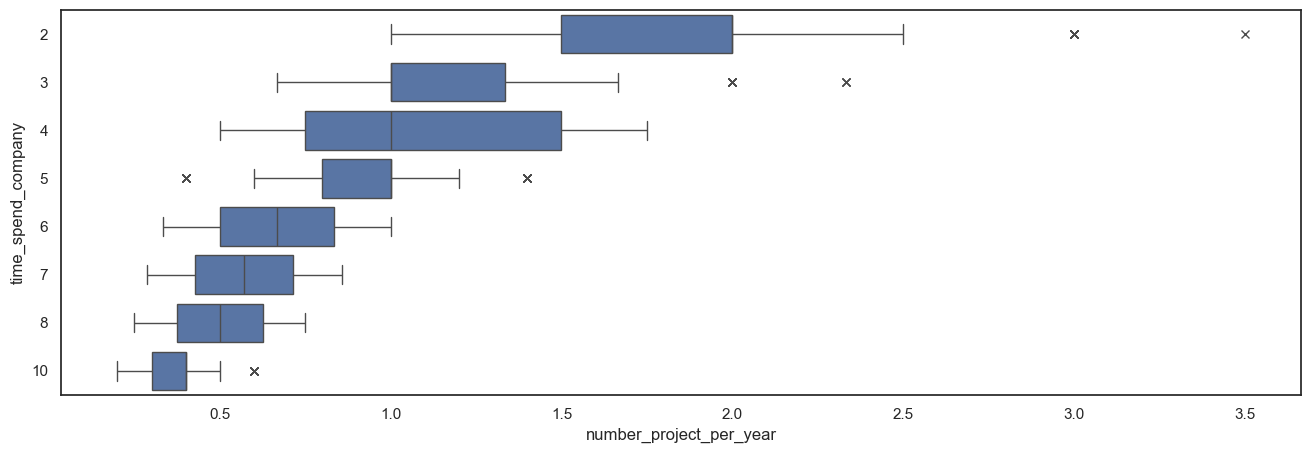

In [23]:
fig, ax = plt.subplots(figsize=(16, 5))
sns.boxplot(data=df, orient='h', y='time_spend_company', x='number_project_per_year', ax=ax, flierprops={'marker': 'x'})
plt.show()

In [24]:
df.groupby(by='time_spend_company')['number_project_per_year'].describe()

,count,mean,std,min,25%,50%,75%,max
time_spend_company,,,,,,,,
2,2910.0,1.842440,0.452072,1.000000,1.500000,2.000000,2.000000,3.500000
3,5190.0,1.152601,0.353875,0.666667,1.000000,1.000000,1.333333,2.333333
4,2005.0,1.105860,0.339766,0.500000,0.750000,1.000000,1.500000,1.750000
5,1062.0,0.892844,0.222584,0.400000,0.800000,1.000000,1.000000,1.400000
6,542.0,0.694649,0.194360,0.333333,0.500000,0.666667,0.833333,1.000000
7,94.0,0.550152,0.149548,0.285714,0.428571,0.571429,0.714286,0.857143
8,81.0,0.472222,0.128087,0.250000,0.375000,0.500000,0.625000,0.750000
10,107.0,0.368224,0.092755,0.200000,0.300000,0.400000,0.400000,0.600000


<Axes: xlabel='number_project_per_year', ylabel='Count'>

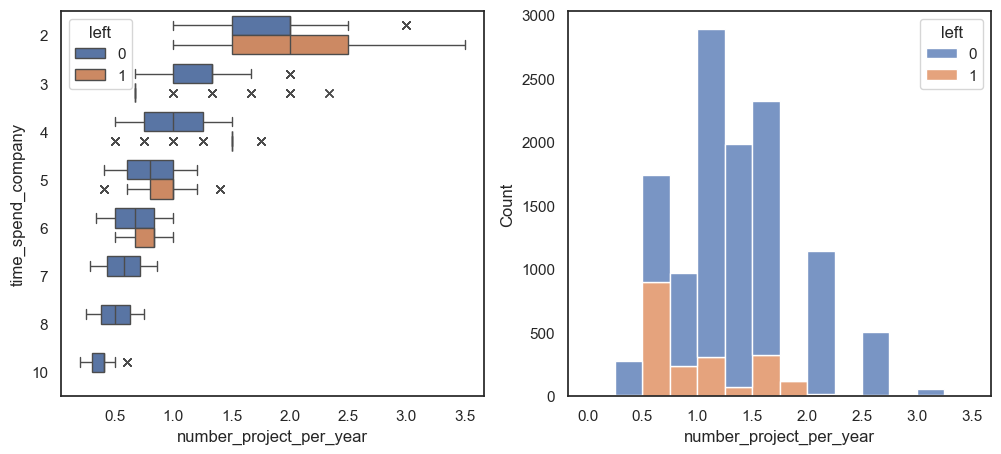

In [25]:
fig, ax = plt.subplots(1, 2, figsize=(12, 5))
sns.boxplot(
    data=df,
    orient='h',
    y='time_spend_company',
    x='number_project_per_year',
    ax=ax[0],
    hue='left',
    flierprops={'marker': 'x'}
)
sns.histplot(
    data=df,
    x='number_project_per_year',
    hue='left',
    multiple='stack',
    bins=14,
    binrange=[0, 3.5],
    ax=ax[1]
)

1. 平均每位员工参与的项目数量在各部门之间均匀分布。
2. 员工参与的项目数量在任职时间上并不均匀分布。员工进入公司的时间越短，在一定时间内被分配的项目越多。一个平均为2年的员工被分配的项目数量是一个5年员工的两倍（1.84对0.89）。这可能是员工离职的一个影响因素。
3. 当员工每年负责的项目数量在0.5到2之间时，会发生员工离职。当员工负责的项目数量超过每年2个或少于每两年1个时，几乎没有人会离开。

##### Average Monthly Hours

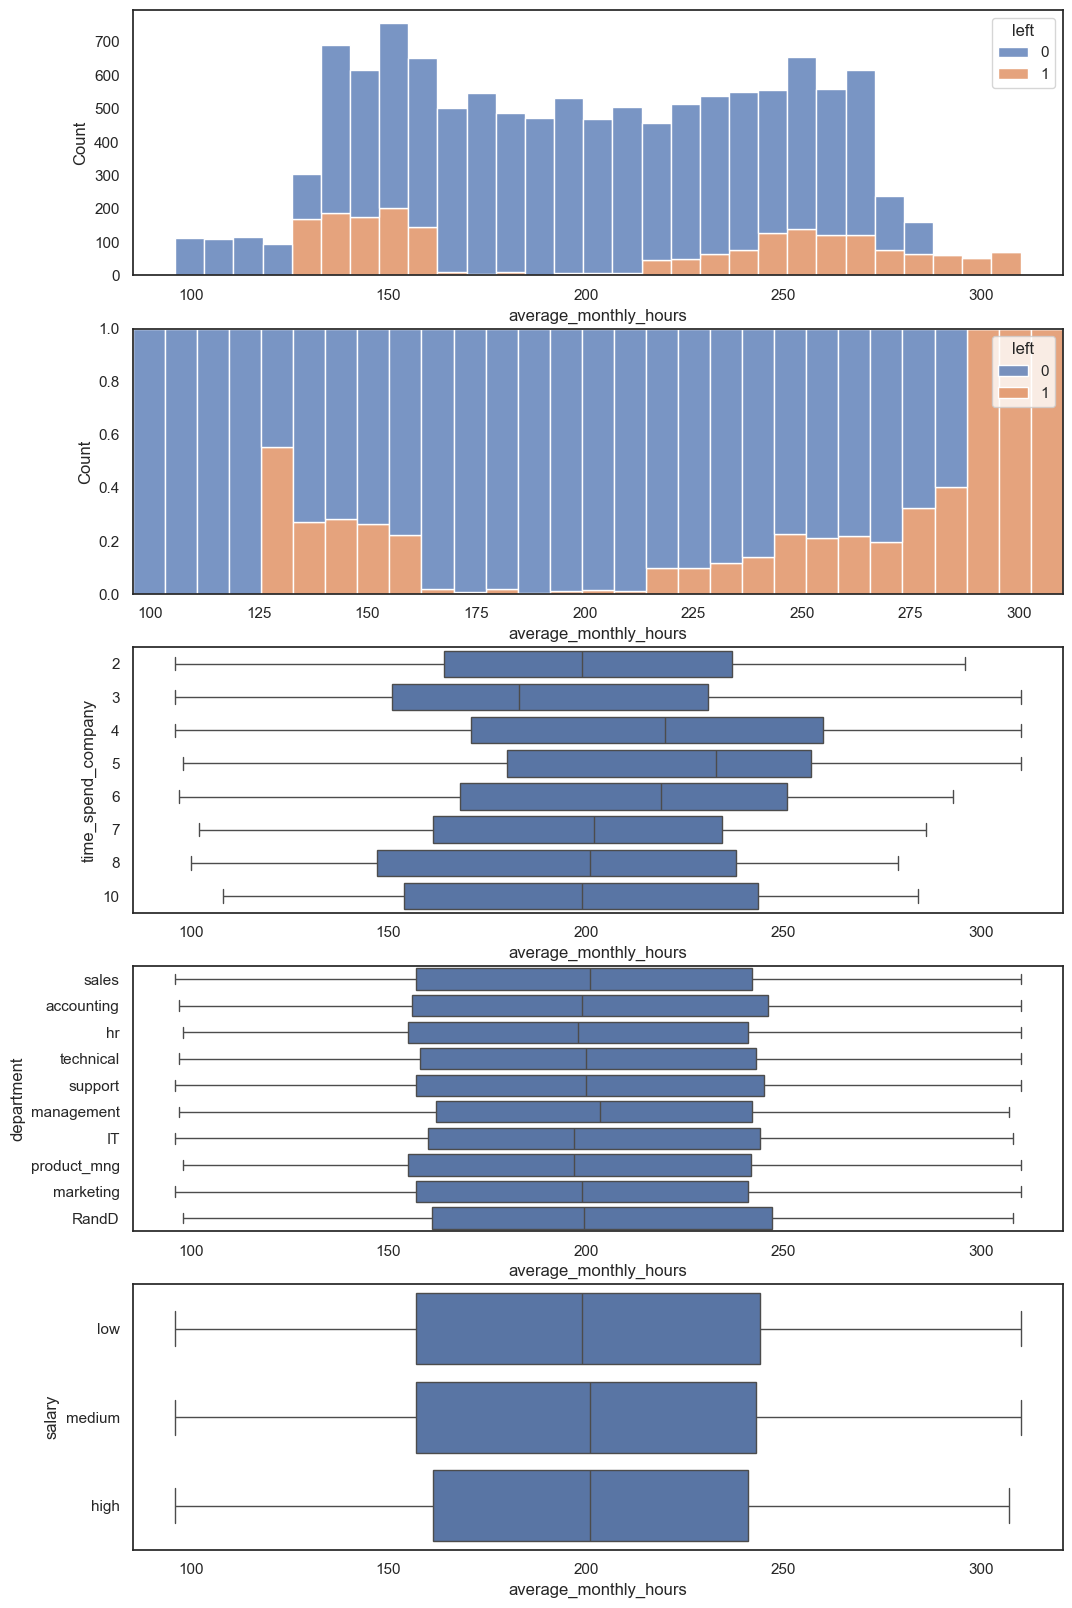

In [26]:
fig, ax = plt.subplots(5, 1, figsize=(12, 20))
sns.histplot(data=df, x='average_monthly_hours', hue='left', multiple='stack', ax=ax[0])
sns.histplot(data=df, x='average_monthly_hours', hue='left', multiple='fill', ax=ax[1])
sns.boxplot(data=df, orient='h', y='time_spend_company', x='average_monthly_hours', ax=ax[2])
sns.boxplot(data=df, orient='h', y='department', x='average_monthly_hours', ax=ax[3])
sns.boxplot(data=df, orient='h', y='salary', x='average_monthly_hours', ax=ax[4])
plt.show()

In [27]:
df['average_monthly_hours'].describe()

count    11991.000000
mean       200.473522
std         48.727813
min         96.000000
25%        157.000000
50%        200.000000
75%        243.000000
max        310.000000
Name: average_monthly_hours, dtype: float64

In [28]:
df[df['average_monthly_hours'] >= 288]['left'].value_counts()

left
1    184
Name: count, dtype: int64

平均每月工作小时数在各部门、任职时间和薪资水平上几乎均匀分布，但其中存在很大的差距。长时间工作的员工可能每个工作日工作超过12小时，比平均员工多出50%。

员工离职率随着平均每月工作小时数的增加而增加，当员工每月工作超过288小时时，离职率达到100%。过度工作可能对那些长时间工作的员工造成巨大负担，从而导致他们的离职。

##### Tenures

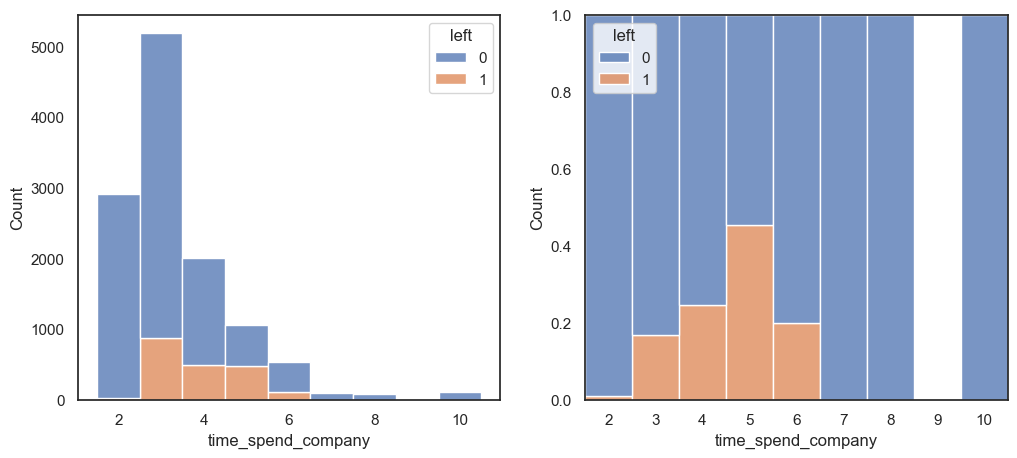

In [29]:
fig, ax = plt.subplots(1, 2, figsize=(12, 5))
sns.histplot(data=df, x='time_spend_company', hue='left', discrete=True, multiple='stack', ax=ax[0])
sns.histplot(data=df, x='time_spend_company', hue='left', discrete=True, multiple='fill', ax=ax[1])
plt.show()

In [30]:
df['time_spend_company'].describe()

count    11991.000000
mean         3.364857
std          1.330240
min          2.000000
25%          3.000000
50%          3.000000
75%          4.000000
max         10.000000
Name: time_spend_company, dtype: float64

In [31]:
df['time_spend_company'].quantile(0.9)

5.0

员工的司龄呈右偏分布，大多数员工在公司工作约3年，90%的员工在公司工作5年或更短。员工离职率随着在公司工作年限的增加而增加，在5年时达到峰值，然后急剧下降（这是因为6年以上的员工基数更少）。

##### 薪资与工作时间

In [32]:
wh = pd.DataFrame(
    data = {
    'workload': pd.qcut(df['average_monthly_hours'], 10),
    'salary': df['salary']
    },
    index=df.index
)
wh = wh.reset_index().groupby(['workload', 'salary'])['index'].count().unstack()
wh = wh[['low', 'medium', 'high']]

<Axes: xlabel='average_monthly_hours', ylabel='Count'>

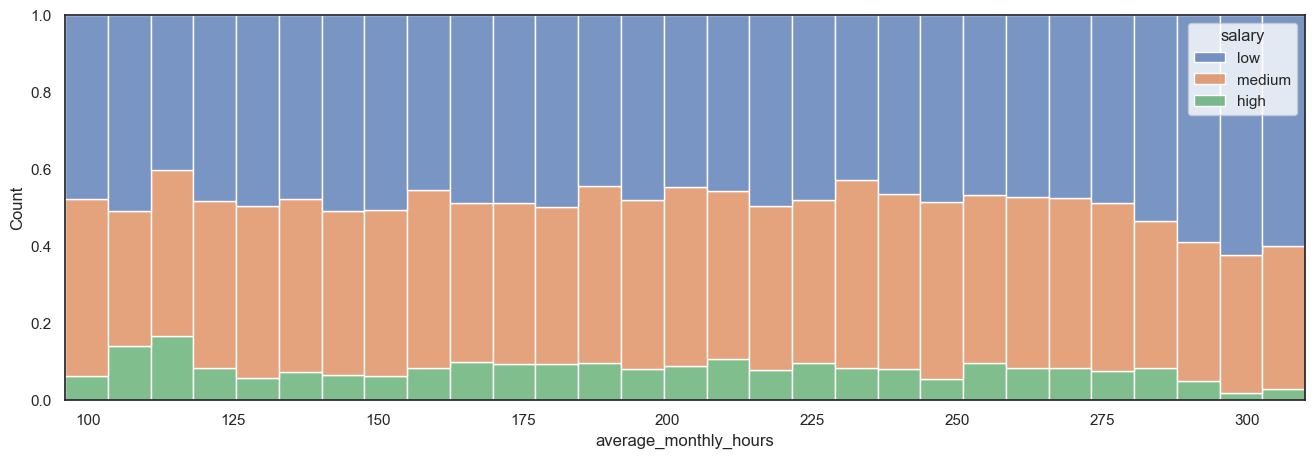

In [33]:
fig, ax = plt.subplots(figsize=(16, 5))
sns.histplot(
    data=df,
    x='average_monthly_hours',
    hue='salary',
    multiple='fill',
#     bins=50,
    ax=ax
)

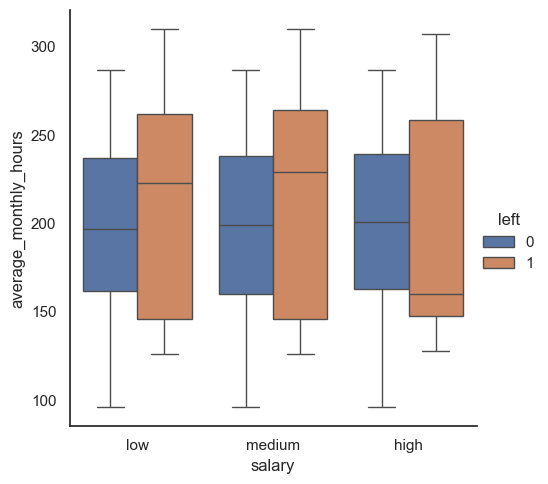

In [34]:
sns.catplot(
    data=df,
    x='salary',
    hue='left',
    y='average_monthly_hours',
    kind='box',
    showfliers=True
)

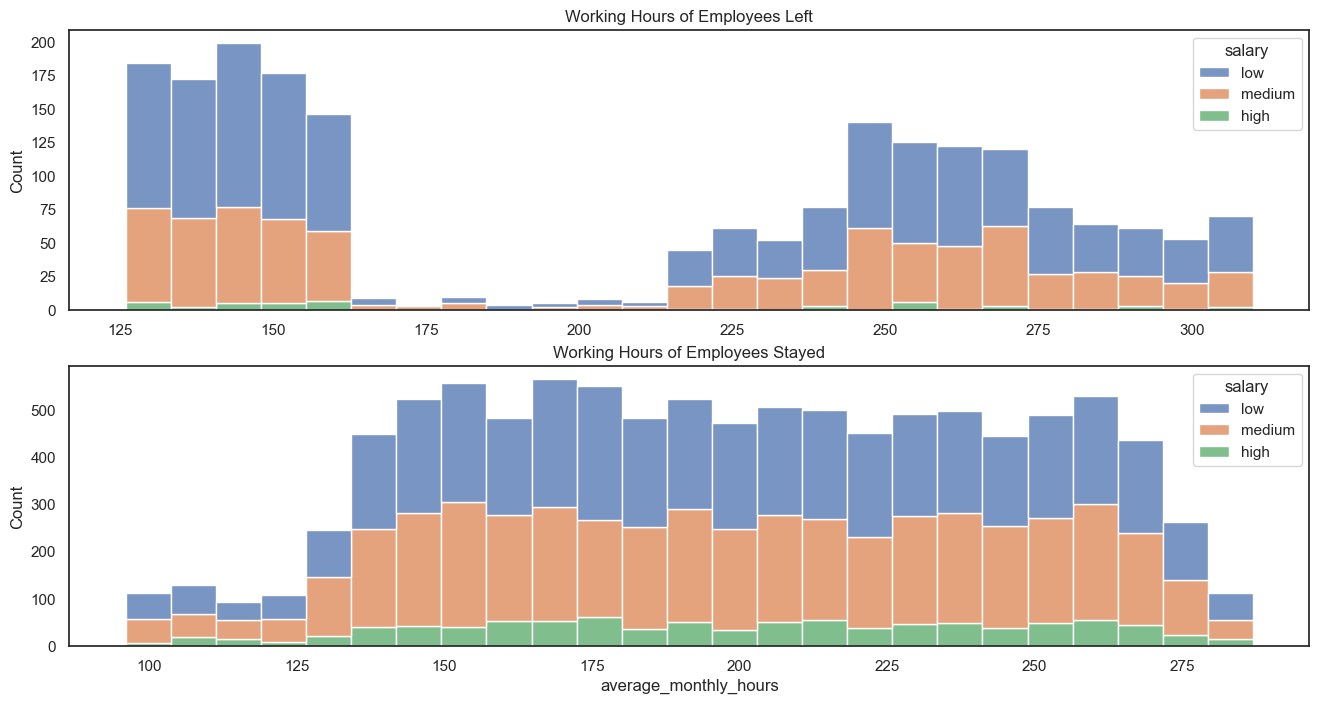

In [35]:
fig, ax = plt.subplots(2, 1, figsize=(16, 8))
sns.histplot(
    data=df[df['left']==1],
    x='average_monthly_hours',
    hue='salary',
    multiple='stack',
    bins=25,
    ax=ax[0]
)
ax[0].set_title('Working Hours of Employees Left')
ax[0].set_xlabel("")
sns.histplot(
    data=df[df['left']==0],
    x='average_monthly_hours',
    hue='salary',
    multiple='stack',
    bins=25,
    ax=ax[1]
)
ax[1].set_title('Working Hours of Employees Stayed')
plt.show()

工资在不同工作小时数之间分布均匀，这可能表明奖励不平衡可能导致员工离职。对离职员工的工作小时数进行仔细观察后发现以下情况：

1. 在工作时间较长的员工中，离职员工和未离职员工之间存在工资上的明显差异，离职员工薪资集中在中低水平，高薪比例非常低。

2. 离职员工按工作时长可以分为主要两类：
   * 每月工作超过220小时的员工
   * 每月工作不到160小时的员工

##### Promotions

<Axes: xlabel='left', ylabel='promotion_last_5years'>

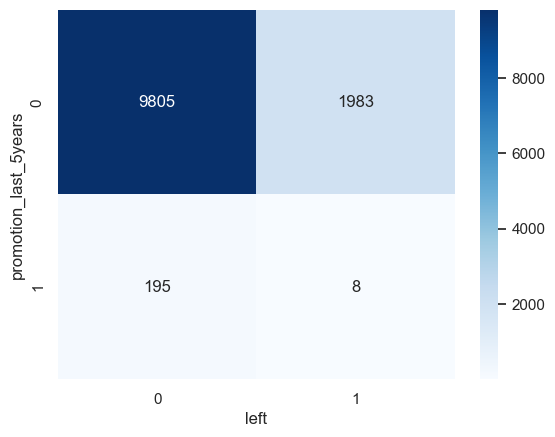

In [36]:
pro_cat = df.groupby(['promotion_last_5years', 'left'])['left'].count().unstack()
sns.heatmap(pro_cat, annot=True, fmt='', cmap='Blues')

In [37]:
pro_cat.stack() / pro_cat.stack().sum()

promotion_last_5years  left
0                      0       0.817697
                       1       0.165374
1                      0       0.016262
                       1       0.000667
dtype: float64

员工晋升比例非常低，而晋升可能是留住员工的关键因素。事实显示，只有4%的受晋升的员工离开了公司，而未受晋升的员工中有16.8%离开了公司。

##### Work Accident

In [38]:
df.groupby('work_accident')['left'].value_counts(normalize=True)

work_accident  left
0              0       0.814022
               1       0.185978
1              0       0.943243
               1       0.056757
Name: proportion, dtype: float64

发生工作事故的人离开公司的比率比工作正常的人要低，这看起来有些违反直觉，需要进一步的假设检验以确认这个结论。

##### Department

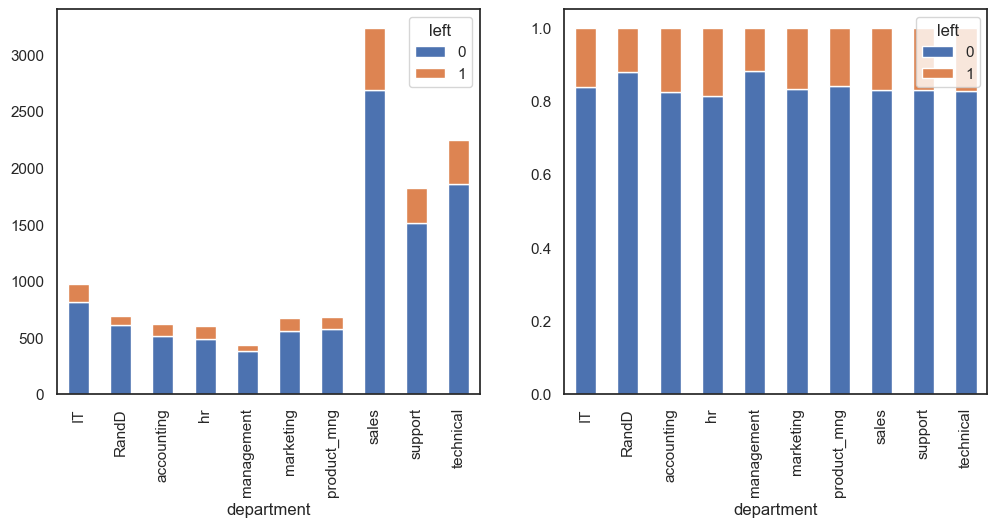

In [39]:
fig, ax = plt.subplots(1, 2, figsize=(12, 5))
df.groupby('department')['left'].value_counts().unstack().plot.bar(stacked=True, ax=ax[0])
df.groupby('department')['left'].value_counts(normalize=True).unstack().plot.bar(stacked=True, ax=ax[1])
plt.show()

员工流失率在各部门间呈均匀分布。

In [40]:
df.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_monthly_hours', 'time_spend_company', 'work_accident', 'left',
       'promotion_last_5years', 'department', 'salary',
       'number_project_per_year'],
      dtype='object')

#### 假设检验

本部分对`work_accident`变量在离职员工与未离职员工两组之间进行检验假设检验，以验证工作事故是否是影响员工离职率的显著因素。

##### T-Test

In [41]:
from scipy import stats

stats.ttest_ind(
    a=df[df['work_accident'] == 1].sample(n=50, replace=True, random_state=42)['left'],
    b=df[df['work_accident'] == 0].sample(n=50, replace=True, random_state=42)['left'],
    equal_var=False
)

TtestResult(statistic=-2.02072594216369, pvalue=0.04688371687053334, df=74.88679245283022)

##### Chi Square Contingency Test

In [42]:
observations = df.groupby(['work_accident', 'left'])['left'].count().unstack()
observations.columns = [['Stayed', 'Left']]
observations.index = observations.index .map({0: 'Have Accident', 1: 'No Accident'})
observations

,Stayed,Left
work_accident,,
Have Accident,8255,1886
No Accident,1745,105


In [43]:
observations.values.flatten().tolist()

[8255, 1886, 1745, 105]

In [44]:
statistic, pvalue, dof, expected = stats.contingency.chi2_contingency(observations, correction=False)

In [45]:
pvalue

6.204026915138356e-43

In [46]:
expected

array([[8457.17621549, 1683.82378451],
       [1542.82378451,  307.17621549]])

##### Chi Square Contingency Test (Boostrap)

In [47]:
# Bootstrap method
import random


box = [1] * observations['Left'].sum().values[0]
box.extend([0] * observations['Stayed'].sum().values[0])

def chi2(observed, expected):
    pearson_residuals = []
    for ob, ex in zip(observed, expected):
        pearson_residuals.append((ob - ex) ** 2 / ex)
    return np.sum(pearson_residuals)

expected_rate = observations['Left'].sum() / observations.sum().sum()
expectations = pd.DataFrame({
    'Stayed_ex': observations.sum(axis=1) * (1 - expected_rate.values[0]),
    'Left_ex': observations.sum(axis=1) * expected_rate.values[0]
})
exp_list = expectations.values.flatten().tolist()
obs_list = observations.values.flatten().tolist()

chi2observed = chi2(obs_list, exp_list)

def perm_fun(box):
    sample_left = [
        sum(random.sample(box, observations.iloc[0,:].sum())),
        sum(random.sample(box, observations.iloc[1,:].sum()))
    ]
    sample_stayed = [
        observations.iloc[0,:].sum() - sample_left[0],
        observations.iloc[1,:].sum() - sample_left[1]
    ]
    sample_list = [sample_stayed[0], sample_left[0], sample_stayed[1], sample_left[1]]
    return chi2(sample_list, exp_list)

perm_chi2 = [perm_fun(box) for _ in range(2000)]
resampled_p_value = sum([chi2 > chi2observed for chi2 in perm_chi2]) / len(perm_chi2)
print(f'Observed Chi2: {chi2observed:.6f}')
print(f'P-value: {resampled_p_value:.6f}')


Observed Chi2: 188.669876
P-value: 0.000000


卡方独立性检验和Bootstrap检验结果均表明，在发生工作事故和未发生工作事故的员工之间的离职率存在显著差异。

### 关键结论

1. 根据数据集，总离职率为16.6%。
2. 满意度水平呈左偏分布。约四分之一的员工满意度水平低于0.5，超过四分之一的员工满意度水平高于0.8。员工离职通常发生在满意度水平低于平均水平时，但也有一部分满意度较高的员工因其他原因离职。
3. 员工的绩效评估在公司内部表现相对均匀。然而，离职率在绩效评价的两个极端处达到峰值。这表明，绩效评价较高和较低的员工都更有可能离开公司，相比之下，中等绩效评价的员工更不容易离职。一个可能的解释是：绩效评价较低的员工更有可能因为与工作职责不匹配而离开，而评价较高的人选择离开是为了追求更高的成就。
4. 平均每位员工参与的项目数量在各部门之间均匀分布。然而，员工每年参与的项目数量在任职时间上并不均匀分布。员工进入公司的时间越短，在一年内被分配的项目越多。一个平均为2年的员工被分配的项目数量是一个5年员工的两倍。这可能是导致离职的一个因素。
5. 平均每月工作小时数在部门、任职时间和薪资水平上几乎均匀分布，但在员工之间存在巨大的差距，范围在96小时到310小时之间，这表明员工之间的工作负载不平衡。当平均每月工作小时数增加时，员工离职率也会增加。当员工每月工作超过288小时时，离职率达到100%。
6. 任职时间呈右偏分布。大多数员工在公司工作大约3年，离职率在此时达到最高点。然而，在5年时离职率达到峰值，之后急剧下降。
7. 工资在不同工作小时数之间分布均匀，这可能表明奖励不平衡可能导致员工离职。在工作时间较长的员工中，离职员工和留下员工之间存在工资上的差异。
8. 晋升可能是留住员工的关键因素。据事实显示，只有4%的受晋升的员工离开了公司，而未受晋升的员工中有16.8%离开了公司。
9. 工作中发生事故的员工更不可能离开公司。进一步的假设检验证实了工作事故与员工离职之间的相关性。
10. 离职率在各个部门大致相同。

### 特征工程

1. 新增特征：平均每年工作任务数
2. 编码特征：
   - 对`department`进行one-hot编码
   - 对`salary`进行label encoding

In [48]:
df['salary_level'] = df['salary'].map({'low': 1, 'medium': 2, 'high': 3})

C:\Users\Administrator\AppData\Local\Temp\ipykernel_11436\1274410740.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['salary_level'] = df['salary'].map({'low': 1, 'medium': 2, 'high': 3})


In [49]:
df.salary_level.value_counts()

salary_level
1    5740
2    5261
3     990
Name: count, dtype: int64

In [50]:
predictor_cols = [
    'satisfaction_level',
    'last_evaluation',
    'number_project_per_year',
    'average_monthly_hours',
    'time_spend_company',
    'work_accident',
    'promotion_last_5years',
    'salary_level',
    'department'
]
X = pd.get_dummies(df[predictor_cols])
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11991 entries, 0 to 11999
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   satisfaction_level       11991 non-null  float64
 1   last_evaluation          11991 non-null  float64
 2   number_project_per_year  11991 non-null  float64
 3   average_monthly_hours    11991 non-null  int64  
 4   time_spend_company       11991 non-null  int64  
 5   work_accident            11991 non-null  int64  
 6   promotion_last_5years    11991 non-null  int64  
 7   salary_level             11991 non-null  int64  
 8   department_IT            11991 non-null  bool   
 9   department_RandD         11991 non-null  bool   
 10  department_accounting    11991 non-null  bool   
 11  department_hr            11991 non-null  bool   
 12  department_management    11991 non-null  bool   
 13  department_marketing     11991 non-null  bool   
 14  department_product_mng   11

## Pace: Construct

### Workflow

最终的建模数据集包含11,991个样本，包含18个特征变量。

1. 将数据分割成训练/验证/测试集（60/20/20）。

2. 在训练集上拟合模型并调整超参数。

3. 在验证集上进行最终模型选择。

4. 评估优胜模型在测试集上的性能。



考虑到业务部门需要针对关键因素进行决策，对准确率要求高，本次项目将采用以下三种模型：
1. Decision Tree
2. Random Forest
3. XGBoost

#### 数据分割

数据集将被分为3个子集：

1. 用于训练模型的训练子集（60%）
2. 用于从模型中选择的验证子集（20%）
3. 用于评估最终模型的测试子集（20%）

In [51]:
y = df['left']
X_tr, X_test, y_tr, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=17)
X_train, X_val, y_train, y_val = train_test_split(X_tr, y_tr, test_size=0.25, stratify=y_tr, random_state=17)
print('Size of X:', X_train.shape, X_val.shape, X_test.shape)
print('Size of y:', y_train.shape, y_val.shape, y_test.shape)

Size of X: (7194, 18) (2398, 18) (2399, 18)
Size of y: (7194,) (2398,) (2399,)


#### 选取评估变量

In [52]:
scoring = ['accuracy', 'precision', 'recall', 'f1']

In [53]:
results = pd.DataFrame(columns=['Model', 'Subset', 'Accuracy', 'Precision', 'Recall', 'F1'])
def make_results(model_name, subset, y_test, y_pred):
    '''
    This function constructs model results in a unanimous format.
    
    Parameters:
        - model_name (string): The name of training model
        - subset (string): whether it scores on a train, validation or a test subset.
        - y_test (list or numpy arrays): the labels of original data
        - y_pred (list or numpy arrays): the predicted labels of the data
    
    Returns:
    pd.DataFrame: a pandas dataframe of the result
    '''
    data_dict = {
        'Model': [model_name],
        'Subset': [subset],
    }
    for s in scoring:
        val_score = eval(f'{s}_score(y_test, y_pred)')
        data_dict[s.title()] = [val_score]
    return pd.DataFrame(data_dict)
        

### 1. Decision Tree

由于决策树可以很好地处理异常值和分类变量，因此在该模型中不需要进行任何转换。

In [54]:
tree = DecisionTreeClassifier(random_state=17)
tree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=17)

In [55]:
tree_pred_train = tree.predict(X_train)
tree_pred_val = tree.predict(X_val)
result_train = make_results('Decision Tree', 'Train', y_train, tree_pred_train)
result_val = make_results('Decision Tree', 'Validation', y_val, tree_pred_val)
results = pd.concat([results, result_train, result_val]).reset_index(drop=True)
results

,Model,Subset,Accuracy,Precision,Recall,F1
0,Decision Tree,Train,1.000000,1.0,1.000000,1.000000
1,Decision Tree,Validation,0.970809,0.9,0.927136,0.913366


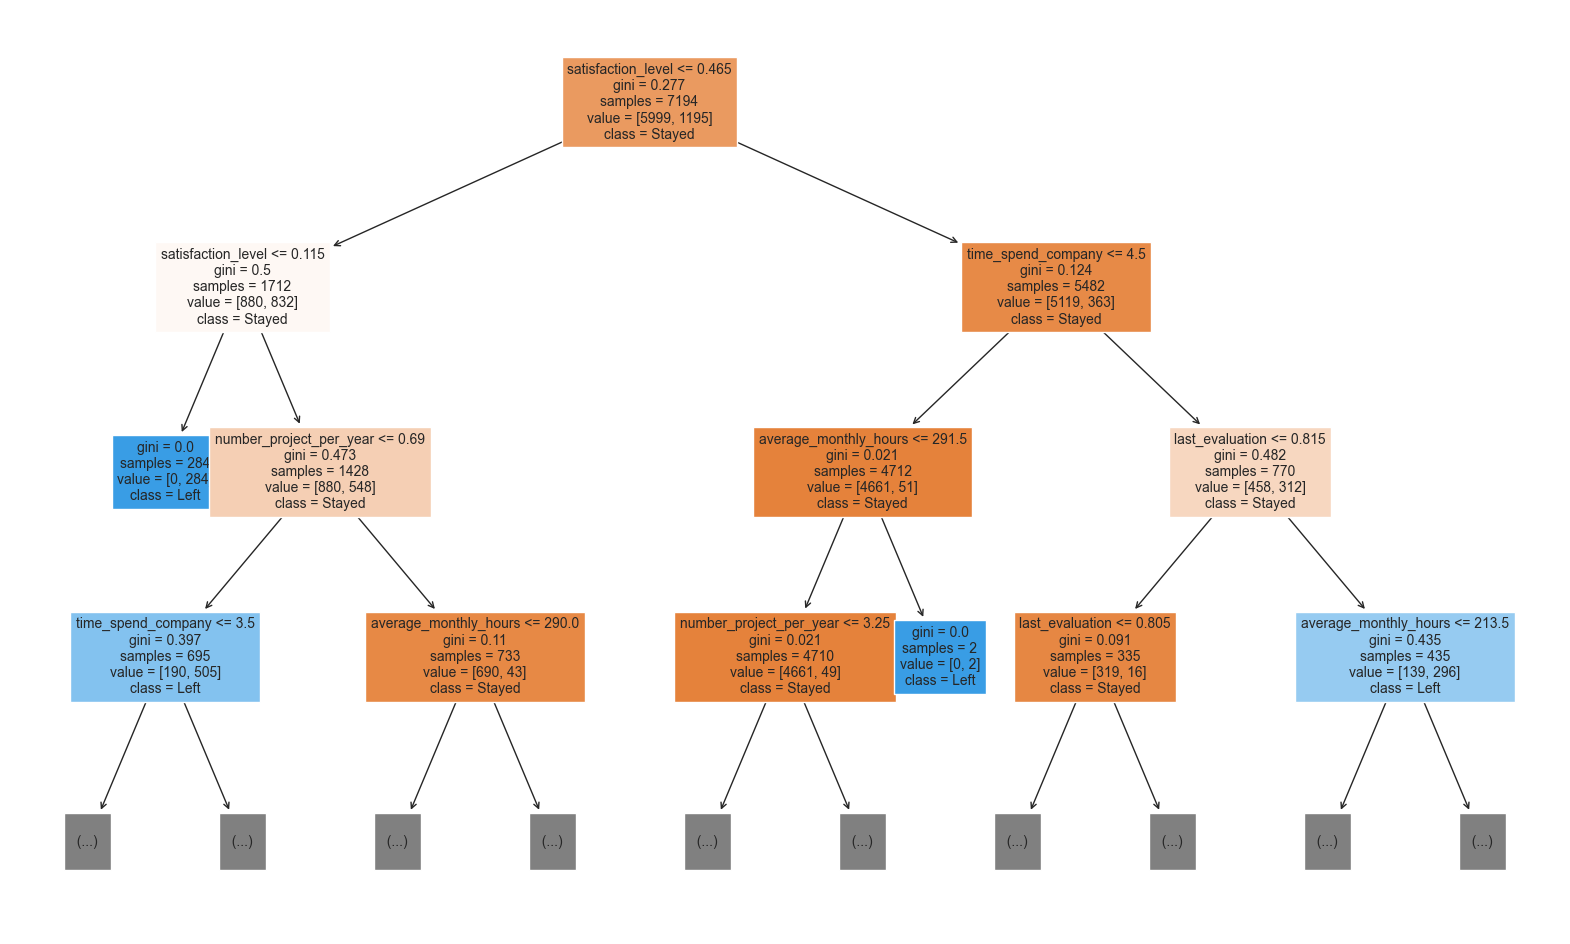

In [56]:
plt.figure(figsize=(20, 12))
plot_tree(tree, max_depth=3, fontsize=10, feature_names=X.columns, class_names={1: 'Left', 0: 'Stayed'}, filled=True)
plt.show()

<Axes: >

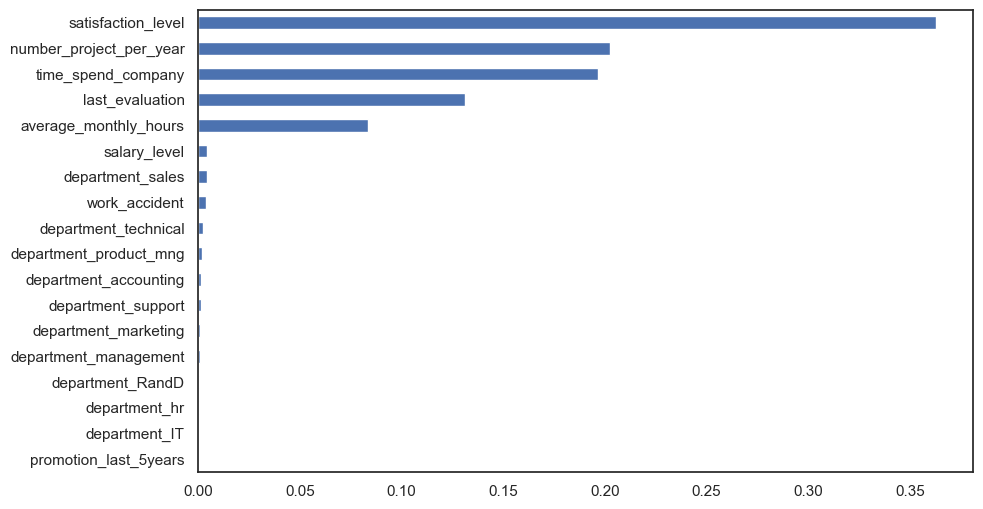

In [57]:
importances = pd.Series(tree.feature_importances_, index=X.columns).sort_values()
fig, ax = plt.subplots(figsize=(10, 6))
importances.plot.barh(ax=ax)

### 2. Random Forest

In [58]:
rf = RandomForestClassifier(random_state=17)
params = {
    'max_depth': [6, 7, 8],
    'max_features': [5, 'sqrt'],
    'n_estimators': [100, 125, 150],
    'min_samples_leaf': [1, 2, 3],
    'min_samples_split': [2, 3, 4]
}
rf_cv = GridSearchCV(
    estimator=rf,
    param_grid=params,
    scoring=scoring,
    cv=5,
    refit='f1',
    n_jobs=5
)
rf_cv.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=17), n_jobs=5,
             param_grid={'max_depth': [6, 7, 8], 'max_features': [5, 'sqrt'],
                         'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [2, 3, 4],
                         'n_estimators': [100, 125, 150]},
             refit='f1', scoring=['accuracy', 'precision', 'recall', 'f1'])

In [59]:
rf_cv.best_params_

{'max_depth': 8,
 'max_features': 5,
 'min_samples_leaf': 1,
 'min_samples_split': 3,
 'n_estimators': 100}

In [60]:
rf_cv.best_score_

0.9367498619889026

In [61]:
rf_tuned = rf_cv.best_estimator_
rf_tuned_pred_train = rf_tuned.predict(X_train)
rf_tuned_pred_val = rf_tuned.predict(X_val)
result_train = make_results('Tuned Random Forest', 'Train', y_train, rf_tuned_pred_train)
result_val = make_results('Tuned Random Forest', 'Validation', y_val, rf_tuned_pred_val)
results = pd.concat([results, result_train, result_val]).reset_index(drop=True)
results

,Model,Subset,Accuracy,Precision,Recall,F1
0,Decision Tree,Train,1.000000,1.000000,1.000000,1.000000
1,Decision Tree,Validation,0.970809,0.900000,0.927136,0.913366
2,Tuned Random Forest,Train,0.982207,0.989001,0.902929,0.944007
3,Tuned Random Forest,Validation,0.983736,0.986450,0.914573,0.949153


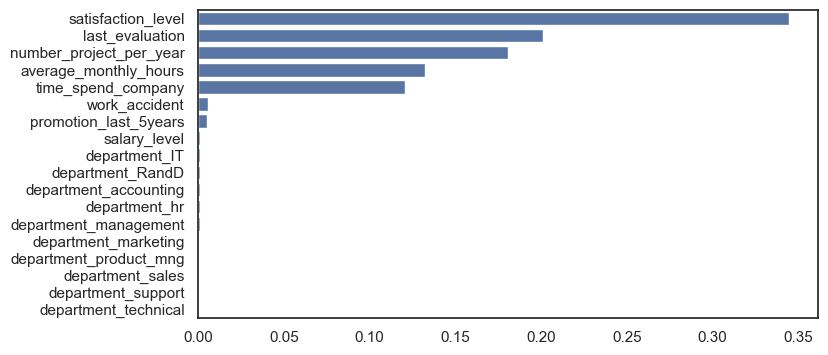

In [62]:
fig, ax = plt.subplots(figsize=(8, 4))
sns.barplot(x=pd.Series(rf_tuned.feature_importances_).sort_values(ascending=False), y=X.columns, ax=ax)
plt.ylabel('')
plt.xlabel('')
plt.show()

### 3. XGBoost

In [63]:
xgb = XGBClassifier(objective='binary:logistic', random_state=17)
cv_params = {
    'n_estimators': [100, 200, 300],
    'max_depth': [5, 6, 7, 8],
    'min_child_weight': [3, 4, 5],
    'learning_rate': [0.01, 0.05, 0.1, 0.15, 0.2]
}
xgb_cv = GridSearchCV(
    estimator=xgb,
    param_grid=cv_params,
    cv=5,
    scoring=scoring,
    refit='f1',
    n_jobs=5
)
xgb_cv.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=17, ...),
             n_jobs=5,
             param_grid={'learning_rate': [0.01, 0.05, 0.1, 0.15, 0.2],
                         'max_depth': [5, 6, 7, 8],
                         'min_child_weight': [3, 4, 5],
                         'n_estimators': [100, 200, 300]},
             refit='f1', scoring=['accuracy', 'precision', 'recall', 'f1'])

In [64]:
xgb_cv.best_params_

{'learning_rate': 0.01,
 'max_depth': 8,
 'min_child_weight': 3,
 'n_estimators': 200}

In [65]:
xgb_cv.best_score_

0.9392002360315382

In [66]:
xgb_tuned = xgb_cv.best_estimator_
xgb_tuned_pred_train = xgb_tuned.predict(X_train)
xgb_tuned_pred_val = xgb_tuned.predict(X_val)
result_train = make_results('Tuned XGBoost', 'Train', y_train, xgb_tuned_pred_train)
result_val = make_results('Tuned XGBoost', 'Validation', y_val, xgb_tuned_pred_val)
results = pd.concat([results, result_train, result_val]).reset_index(drop=True)
results

,Model,Subset,Accuracy,Precision,Recall,F1
0,Decision Tree,Train,1.000000,1.000000,1.000000,1.000000
1,Decision Tree,Validation,0.970809,0.900000,0.927136,0.913366
2,Tuned Random Forest,Train,0.982207,0.989001,0.902929,0.944007
3,Tuned Random Forest,Validation,0.983736,0.986450,0.914573,0.949153
4,Tuned XGBoost,Train,0.980956,0.987109,0.897071,0.939939
5,Tuned XGBoost,Validation,0.984153,0.989130,0.914573,0.950392


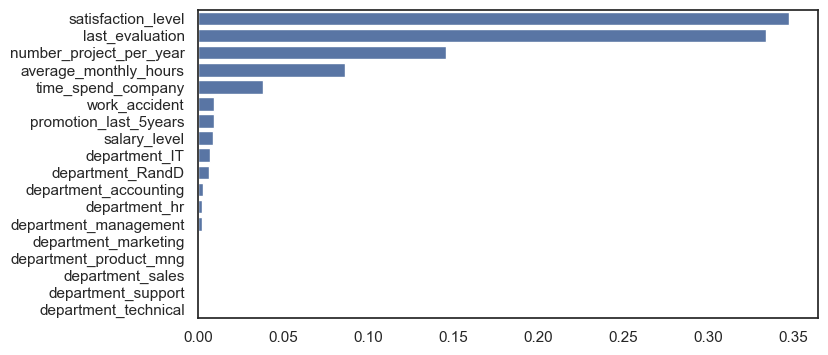

In [67]:
fig, ax = plt.subplots(figsize=(8, 4))
sns.barplot(x=pd.Series(xgb_tuned.feature_importances_).sort_values(ascending=False), y=X.columns, ax=ax)
plt.ylabel('')
plt.xlabel('')
plt.show()

#### 模型选择

在考虑采取行动减少员工流失风险时，F1分数成为模型评估和选择的最合适指标。以下是选择该指标的原因：

1. 假阳性影响：模型预测员工将离职，但实际上并没有。这可能导致针对没有离职意愿的员工采取不必要的干预措施，从而造成大量资源和精力的浪费。

2. 假阴性影响：即模型未能预测实际上计划离职的员工。这意味着模型未能正确指向员工离职背后的原因，可能会妨碍未来旨在降低离职率的改进措施。

根据验证数据集获得的最终结果，经过调优的XGBoost模型具有最高的F1分数，有效平衡了召回率和精度。

基于F1分数，选择XGBoost模型来预测员工流失。

In [68]:
results[results['Subset'] == 'Validation'].sort_values(by='F1', ascending=False)

,Model,Subset,Accuracy,Precision,Recall,F1
5,Tuned XGBoost,Validation,0.984153,0.98913,0.914573,0.950392
3,Tuned Random Forest,Validation,0.983736,0.98645,0.914573,0.949153
1,Decision Tree,Validation,0.970809,0.90000,0.927136,0.913366


# Pace: Execute

### 模型评估

In [69]:
xgb_tuned

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=8, max_leaves=None,
              min_child_weight=3, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=200, n_jobs=None,
              num_parallel_tree=None, random_state=17, ...)

In [70]:
y_pred = xgb_tuned.predict(X_test)
final_result = make_results('Tuned XGBoost', 'Test', y_test, y_pred)
final_result

,Model,Subset,Accuracy,Precision,Recall,F1
0,Tuned XGBoost,Test,0.987912,0.984252,0.942211,0.962773


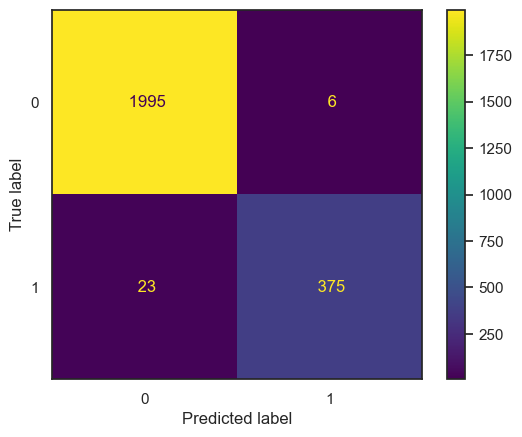

In [71]:
cm = confusion_matrix(y_test, y_pred, labels=xgb_tuned.classes_)
disp = ConfusionMatrixDisplay(
    confusion_matrix=cm,
    display_labels=xgb_tuned.classes_
)
disp.plot(values_format=' ')
plt.show()

经过调优的XGBoost模型显示准确率为0.9879，精度为0.9843（98.43%的预测离职实际发生），召回率为0.9422（94.22%的离职被预测）。评估结果显示，XGBoost模型是一个良好的预测模型，并且可以在进一步降低流失率的行动中加以利用。

### Feature Importance

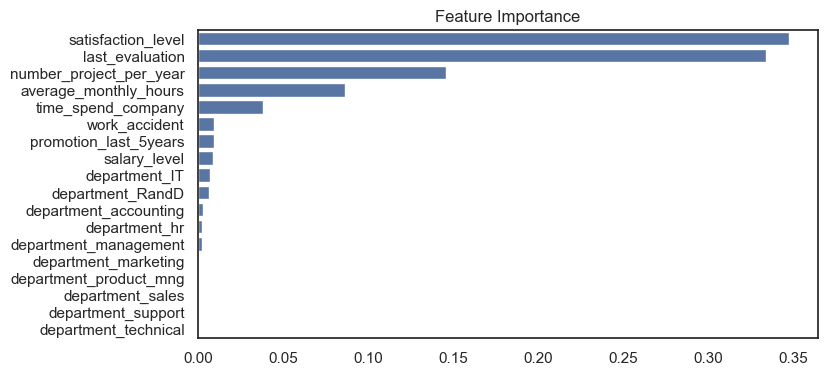

In [72]:
fig, ax = plt.subplots(figsize=(8, 4))
sns.barplot(x=pd.Series(xgb_tuned.feature_importances_).sort_values(ascending=False), y=X.columns, ax=ax)
plt.ylabel('')
plt.xlabel('')
plt.title('Feature Importance')
plt.show()

决定员工是否离开公司的最显著的特征包括员工满意度、工作年限和每年分配的项目数量：

- `satisfaction_level`：员工的满意度水平是员工离职的主要原因。然而，虽然员工离职通常发生在满意度水平低于平均水平时，但也有一部分满意度较高的员工因其他原因离开工作。
- `last_evaluation`：该变量反映了员工的工作水平，员工离职率在工作水平上呈双峰分布，在中低水平绩效和高水平绩效的员工中较高。
- `number_project_per_year`：员工进入公司后平均每年被分配的项目数量。一个平均为2年的员工被分配的项目数量是一个5年员工的两倍，这可能是导致离职的重要原因；另一方面，员工离职意愿也可能跟项目稳定性有关，一项持续时间较长、责任变动较小的项目在一定程度上也会带来员工的稳定性。

其他显著导致员工流失的因素还包括月均工作时长和工作年限。

### 结论及建议

1. 本次建立的XGBoost模型具有良好的预测性，预测准确率和精度均在98%以上，且召回率接近95%，可用于预测员工离职意愿，并为HR部门针对降低员工流转率的措施提供方向。
2. XGBoost模型的特征重要性表明，HR部门可以考虑在员工满意度水平、员工绩效评价、工作项目分配等方面进行改进。
    - 员工满意度：重新评估影响员工满意度的各项因素，改善工作环境和员工福利
    - 员工绩效：**离职率**在绩效评价的两个极端处达到峰值。HR部门应重新评估审查绩效评价流程，确保绩效结果客观公正，减少因结果不公导致的员工流失；针对高绩效的员工，提供与之相对应的薪酬福利，减少优秀员工流失。
    - 项目数量和月均工作时长：年均项目数越多的员工离职率越高，这表明工作负担过大或项目稳定性过低是决定员工离职的重要影响因素；另一方面，工作时长严重超负荷的员工离职率非常高，且高薪比例过低。HR部门应对员工工作量进行评估，推动各部门合理安排员工的工作任务，确保每个员工的工作负载适中。
    - 工作年限：重视员工的职业发展，提供长期的发展机会和晋升途径。
3. HR部门在应用模型进行离职预测时，有必要对员工隐私进行保护，防止过度干预。